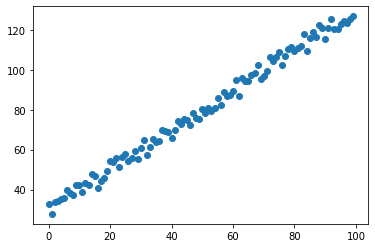

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 데이터 생성
def data_gen(n, b, v):
    x = np.zeros(shape= (n, 2))
    y = np.zeros(shape= n)
    
    for i in range(0, n):
        x[i][0] = 1
        x[i][1] = i
        
        y[i] = (i + b) + random.uniform(0, 1) * v
        
    return x, y

x, y = data_gen(100, 25, 10)
plt.plot(x[:, 1], y, 'o')

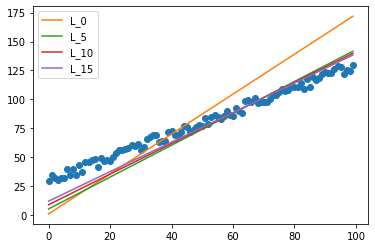

In [9]:
# 경사하강법
def g_descent(x, y, th, a, m, ns):
    xT = x.T  # np.transpose(x), x.transpose(), x.T
    th_l = []  # xnew의 변화를 기록
    cost_l = []  # 비용 함수의 변화를 기록
    
    for i in range(0, ns):
        h = np.dot(x, th)  # 예측값
        loss = h - y  # 오차 생성
        cost = (np.sum(loss ** 2)) / (2 * m)  # 비용 함수
        g = np.dot(xT, loss) / m  #  경사
        th= th - (a * g)  # xnew 갱신
        
        if i % 250 == 0:  # 250번째만 기록
            th_l.append(th)
        
        cost_l.append(cost)
        
    return th, np.array(th_l), cost_l

m, n = np.shape(x)
ns = 5000  # 반복횟수
a = 0.0005  # 학습률
th = np.ones(n)

th, th_l, cost_l = g_descent(x, y, th, a, m, ns)

y_p_step = np.dot(x, th_l.T)

plt.plot(x[:, 1], y, 'o')

for i in range(0, 20, 5):
    plt.plot(x[:, 1], y_p_step[:, i], label= f'L_{i}')

plt.legend()

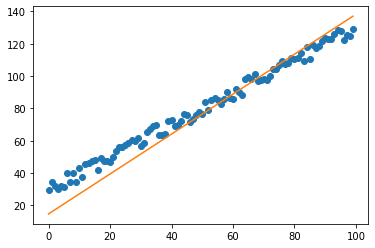

In [10]:
y_p = np.dot(x, th)

plt.plot(x[:, 1], y, 'o')
plt.plot(x[:, 1], y_p)

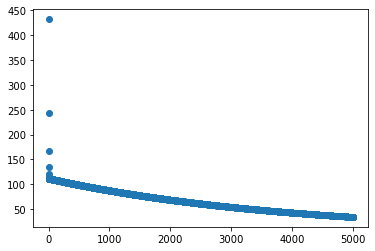

In [11]:
ck_i = range(len(cost_l))

plt.scatter(ck_i, cost_l)